## Classfication of Email Spam Using Support Vector Machines
**Import Necessary Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

**Load data, split, plot**

In [2]:
# Load data from CSV file using pandas
data = pd.read_csv("spambase_csv.csv")
print(data)
# Split data into features (X) and target variable (y)
X = data.drop(columns=['class'])
y = data['class']
# Plot each instance based on target label
spam_data = data[data['class'] == 1]
non_spam_data = data[data['class'] == 0]

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00     

In [3]:
print("\n\nThe Shape Of the dataset is : ",data.shape)
print("\n\nThe Attributes of the dataset is : ",data.columns)
print("The Number of Missing Values in the dataset\n")
print(data.isnull().sum())



The Shape Of the dataset is :  (4601, 58)


The Attributes of the dataset is :  Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', '

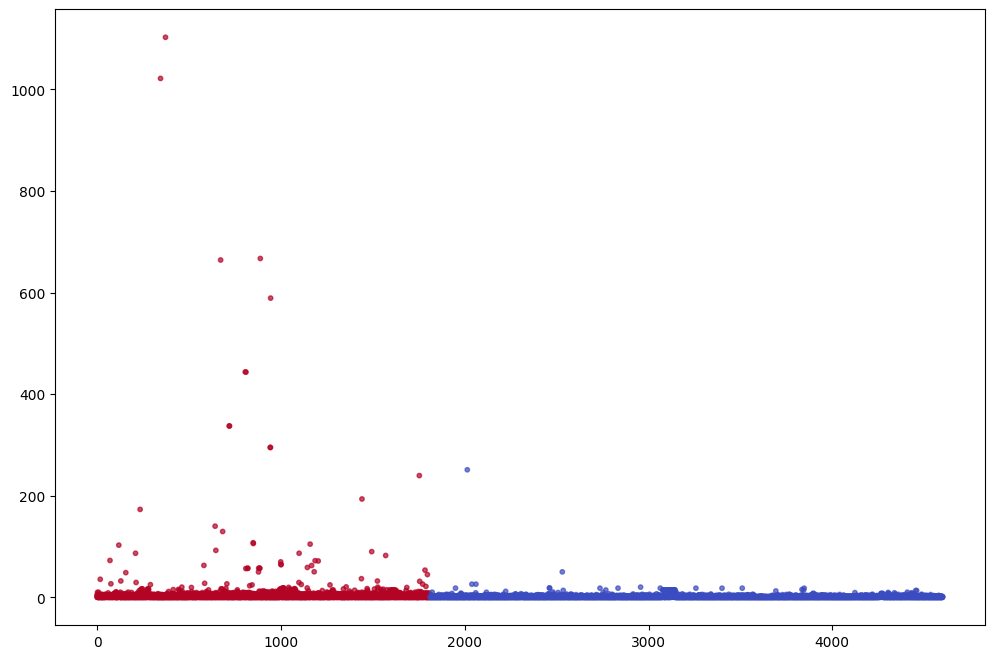

In [5]:
# Plot each instance with feature values, color-coded by class (spam or ham)
plt.figure(figsize=(12, 8))
plt.scatter(data.index, data['capital_run_length_average'], c=data['class'], cmap='coolwarm', label='Feature 1', alpha=0.7, s=10)
plt.scatter(data.index, data['word_freq_address'], c=data['class'], cmap='coolwarm', label='Feature 2', alpha=0.7, s=10)

In [6]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**1. Linear Kernel**

Accuracy (Linear Kernel): 0.9229098805646037


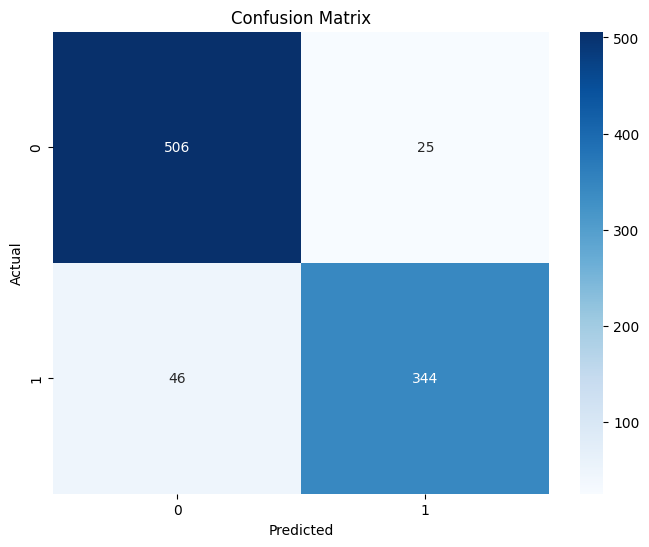

In [7]:
#1.Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)
accuracy_linear = svm_linear.score(X_test, y_test)
print("Accuracy (Linear Kernel):", accuracy_linear)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**2. Polynomial Kernel**

Accuracy (Polynomial Kernel): 0.6254071661237784


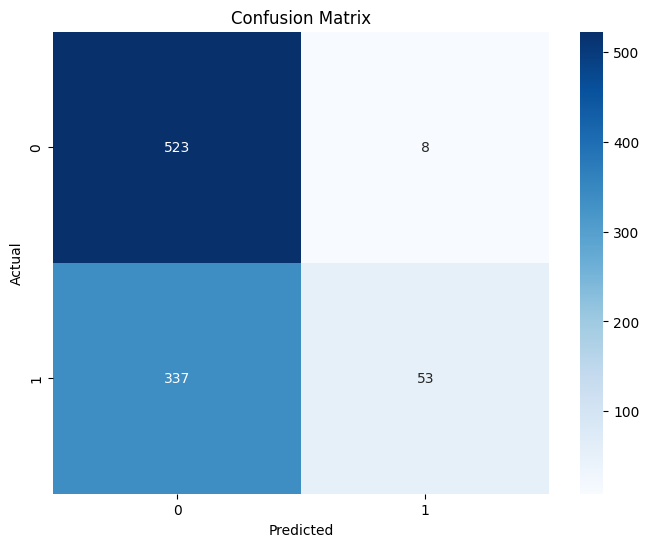

In [8]:
#2.Polynomial Kernel
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred = svm_poly.predict(X_test)
accuracy_poly = svm_poly.score(X_test, y_test)
print("Accuracy (Polynomial Kernel):", accuracy_poly)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**3. Sigmoid Kernel**

Accuracy (Sigmoid Kernel): 0.6351791530944625


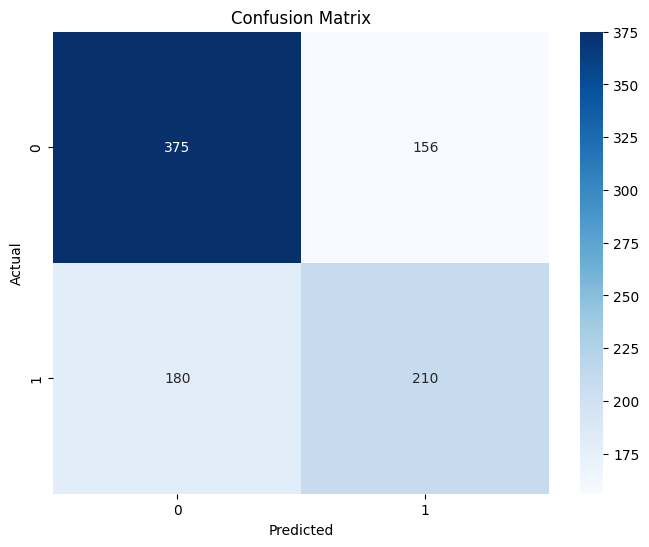

In [9]:
#3.Sigmoid Kernel
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred = svm_sigmoid.predict(X_test)
accuracy_sigmoid = svm_sigmoid.score(X_test, y_test)
print("Accuracy (Sigmoid Kernel):", accuracy_sigmoid)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**4. RBF Kernel**

Accuracy (RBF Kernel): 0.6623235613463626


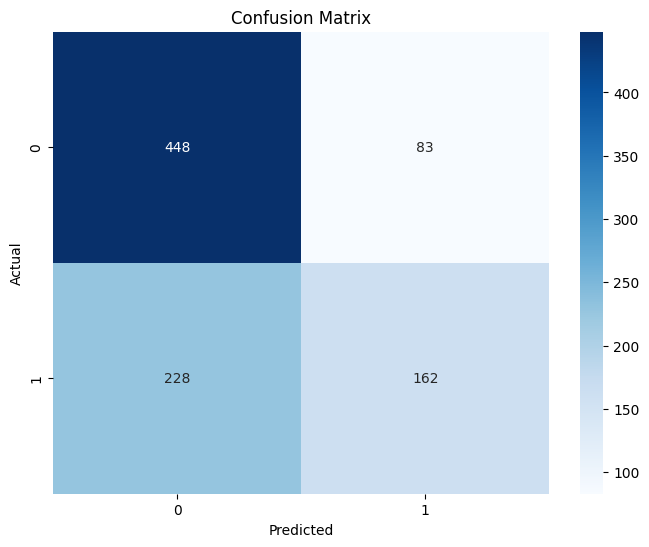

In [10]:
# 4.RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)
accuracy_rbf = svm_rbf.score(X_test, y_test)
print("Accuracy (RBF Kernel):", accuracy_rbf)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Accuracy:**

In [11]:
print("Accuracy (Linear Kernel)     : ", accuracy_linear*100)
print("Accuracy (Polynomial Kernel) : ", accuracy_poly*100)
print("Accuracy (Sigmoid Kernel)    : ", accuracy_sigmoid*100)
print("Accuracy (RBF Kernel)    : ", accuracy_rbf*100)

Accuracy (Linear Kernel)     :  92.29098805646036
Accuracy (Polynomial Kernel) :  62.54071661237784
Accuracy (Sigmoid Kernel)    :  63.51791530944625
Accuracy (RBF Kernel)    :  66.23235613463626


## Classification of Email Spam or Ham using Naïve Bayes Algorithm

Accuracy: 0.7861020629750272


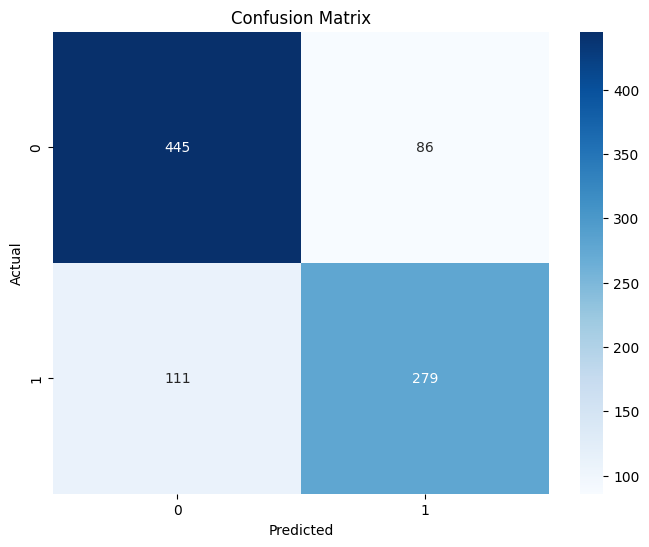

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Predict the labels of test data
y_pred = naive_bayes_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()